<a href="https://colab.research.google.com/github/Susmitasharma-1/AI-final-assignment/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# PART 1: IMPORT LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


Load Dataset

In [2]:

# LOAD DATASET

df = pd.read_csv("/content/drive/MyDrive/concepts of AI/energy_efficiency_data.csv")

# Display first 5 rows
df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Dataset Check

In [3]:
# Dataset shape
df.shape


(768, 10)

In [4]:
# Column names
df.columns


Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [5]:
# Data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


DATA UNDERSTANDING & BASIC PREPROCESSING

In [6]:

# PART 2: DATA UNDERSTANDING

# Summary statistics
df.describe()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Check Missing Values

In [7]:
# Check missing values
df.isnull().sum()


,0
Relative_Compactness,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing_Area,0
Glazing_Area_Distribution,0
Heating_Load,0
Cooling_Load,0


Select Features and Target

In [8]:

# FEATURE & TARGET SELECTION

X = df.drop(columns=["Heating_Load", "Cooling_Load"])  # Features
y = df["Heating_Load"]                      # Target: Heating Load

Train-Test Split

In [9]:

# TRAIN - TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_test.shape)


(614, 8) (154, 8)


Feature Scaling

In [10]:

# FEATURE SCALING

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


EXPLORATORY DATA ANALYSIS
Target Distribution

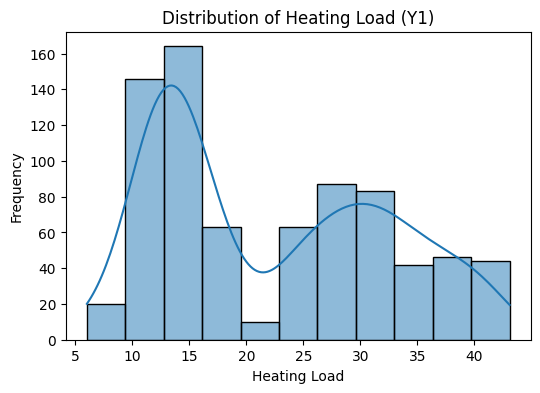

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("Distribution of Heating Load (Y1)")
plt.xlabel("Heating Load")
plt.ylabel("Frequency")
plt.show()


Correlation Heatmap

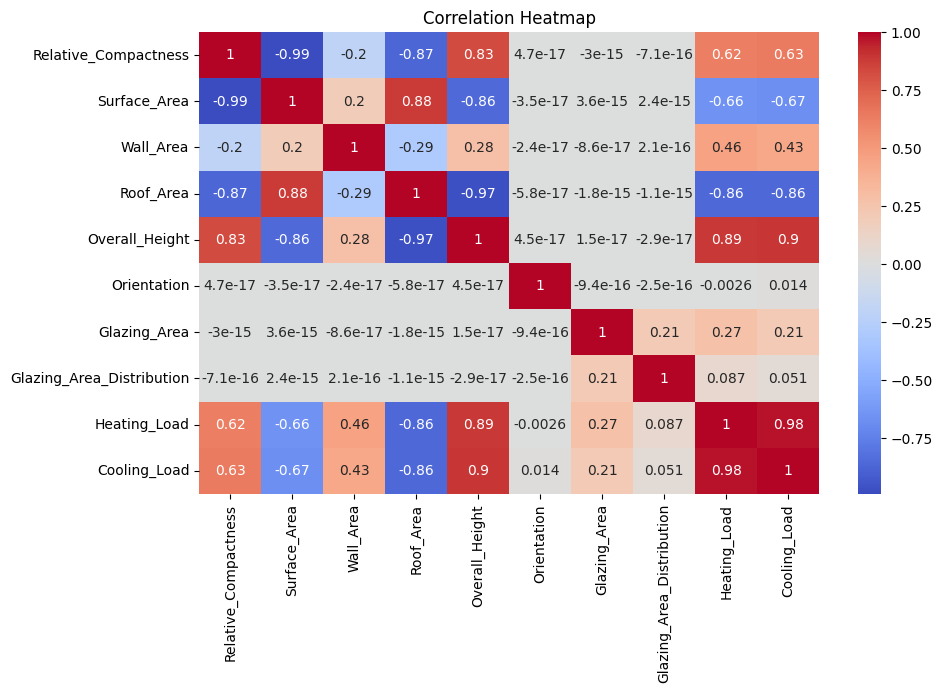

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Scatter Plot (Example)

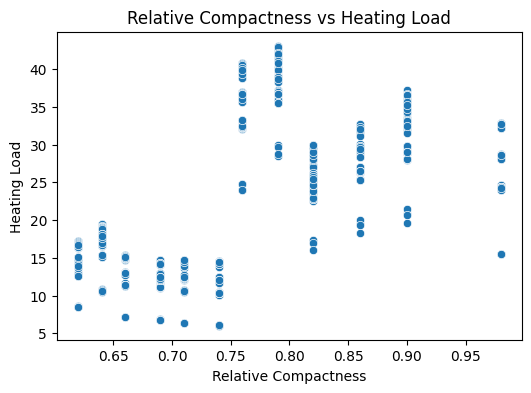

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Relative_Compactness"], y=y)
plt.title("Relative Compactness vs Heating Load")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.show()

NEURAL NETWORK REGRESSION MODEL

In [14]:

# PART 5: NEURAL NETWORK MODEL

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluation
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mlp_r2 = r2_score(y_test, y_pred_mlp)

mlp_mae, mlp_rmse, mlp_r2


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.7639809513086435, np.float64(1.0554291541789027), 0.9893129220269253)

CLASSICAL REGRESSION MODELS

In [15]:

# LINEAR REGRESSION

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

lr_mae, lr_rmse, lr_r2


(2.1820470221279225, np.float64(3.0254235827736182), 0.912184095154691)

Random Forest Regressor

In [16]:

# RANDOM FOREST REGRESSOR

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

rf_mae, rf_rmse, rf_r2


(0.35489545454545424, np.float64(0.49263764916683306), 0.9976716085106088)

HYPERPARAMETER TUNING

In [17]:

# PART 7: HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2"
)

grid_rf.fit(X_train, y_train)

grid_rf.best_params_, grid_rf.best_score_


({'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100},
 np.float64(0.9973818195285455))

FEATURE SELECTION

In [18]:

# PART 8: FEATURE IMPORTANCE

importances = grid_rf.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
0,Relative_Compactness,0.386447
1,Surface_Area,0.188587
4,Overall_Height,0.151004
3,Roof_Area,0.135531
6,Glazing_Area,0.079107
2,Wall_Area,0.046204
7,Glazing_Area_Distribution,0.012426
5,Orientation,0.000694


In [19]:
selected_features = feature_importance_df["Feature"].head(5).tolist()
selected_features


['Relative_Compactness',
 'Surface_Area',
 'Overall_Height',
 'Roof_Area',
 'Glazing_Area']

FINAL MODEL WITH SELECTED FEATURES

In [20]:

# PART 9: FINAL MODEL

X_selected = df[selected_features]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42
)

final_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_train_sel, y_train_sel)

y_final_pred = final_rf.predict(X_test_sel)

final_rmse = np.sqrt(mean_squared_error(y_test_sel, y_final_pred))
final_r2 = r2_score(y_test_sel, y_final_pred)

final_rmse, final_r2


(np.float64(0.5013260599402074), 0.9975887548543136)

FINAL COMPARISON TABLE

In [21]:

# PART 10: COMPARISON TABLE

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Neural Network"],
    "RMSE": [lr_rmse, rf_rmse, mlp_rmse],
    "R2 Score": [lr_r2, rf_r2, mlp_r2]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,3.025424,0.912184
1,Random Forest,0.492638,0.997672
2,Neural Network,1.055429,0.989313
